In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib



Accuracy: 0.8433333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       189
           1       0.80      0.77      0.79       111

    accuracy                           0.84       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.84      0.84      0.84       300



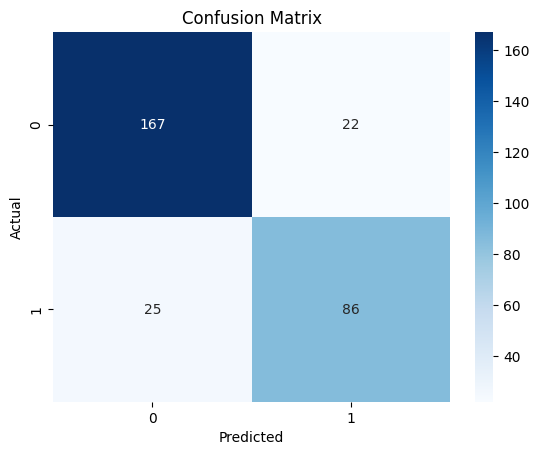

In [2]:

# Load the dataset
df = pd.read_csv("The_Cancer_data_1500_V2.csv")

# Separate features and target
X = df.drop("Diagnosis", axis=1)
y = df["Diagnosis"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)

# Accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [4]:
# Save the model and scaler
joblib.dump(model, "cancer_prediction_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully.")

Model and scaler saved successfully.
